In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,NaN


In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.00000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.40000,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.00000,2.000000,5.00000
charges,1316.0,13262.294541,12094.261631,1121.8739,4744.32505,9333.01435,16604.302645,63770.42801


In [3]:
# Checking for the existence of missing values
data.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges     22
dtype: int64

In [4]:
#Filling missing values with the mean
data.charges = data.charges.fillna(data.charges.mean())

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

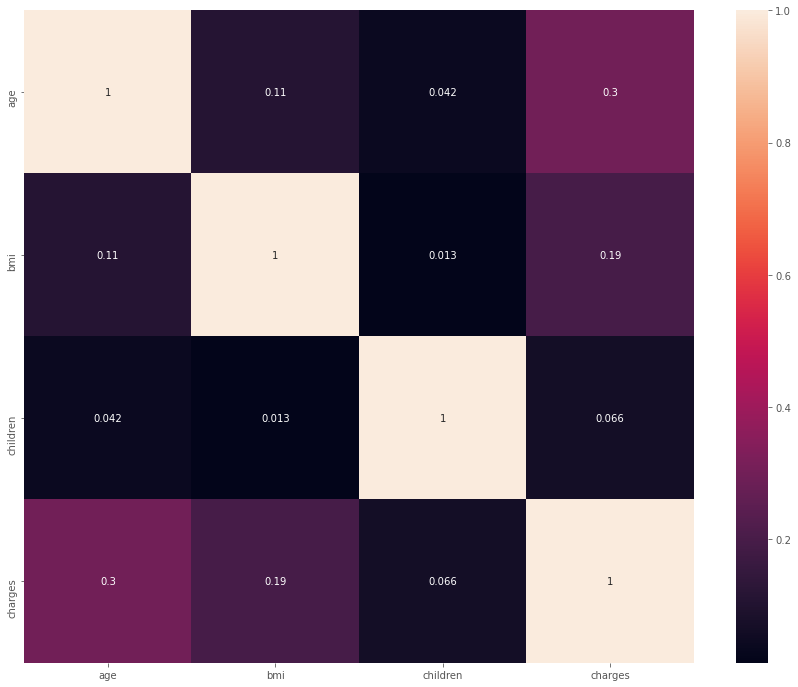

In [5]:
#Basic EDA
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True)

Text(0.5, 1.0, 'Distribution of BMI')

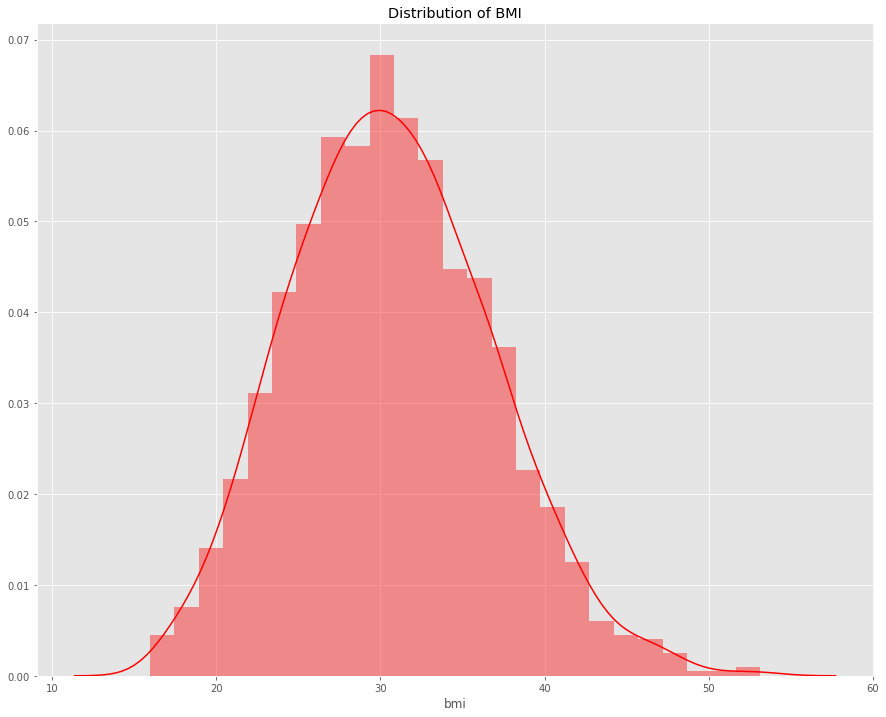

In [6]:
plt.figure(figsize=(15,12))
sns.distplot(data.bmi, color='red').set_title('Distribution of BMI')

Text(0.5, 1.0, 'Distribution of Charges')

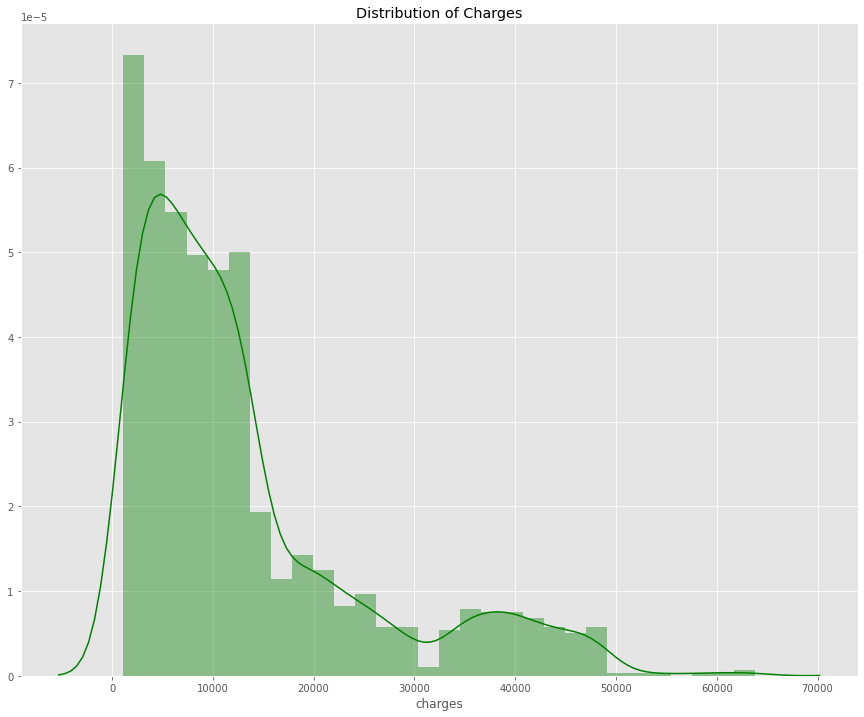

In [7]:
plt.figure(figsize=(15,12))
sns.distplot(data.charges, color='green').set_title('Distribution of Charges')

Text(0.5, 1.0, 'Result of charges based on the patient age')

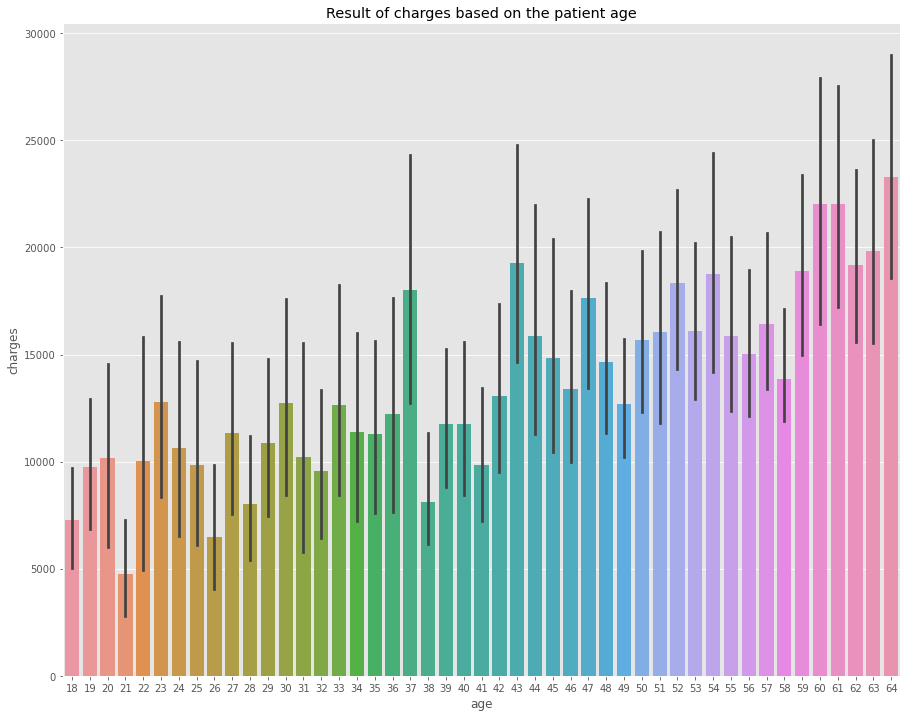

In [8]:
plt.figure(figsize=(15,12))
sns.barplot(x='age', y='charges', data=data).set_title('Result of charges based on the patient age')

Text(0.5, 1.0, 'Result of charges based on sex')

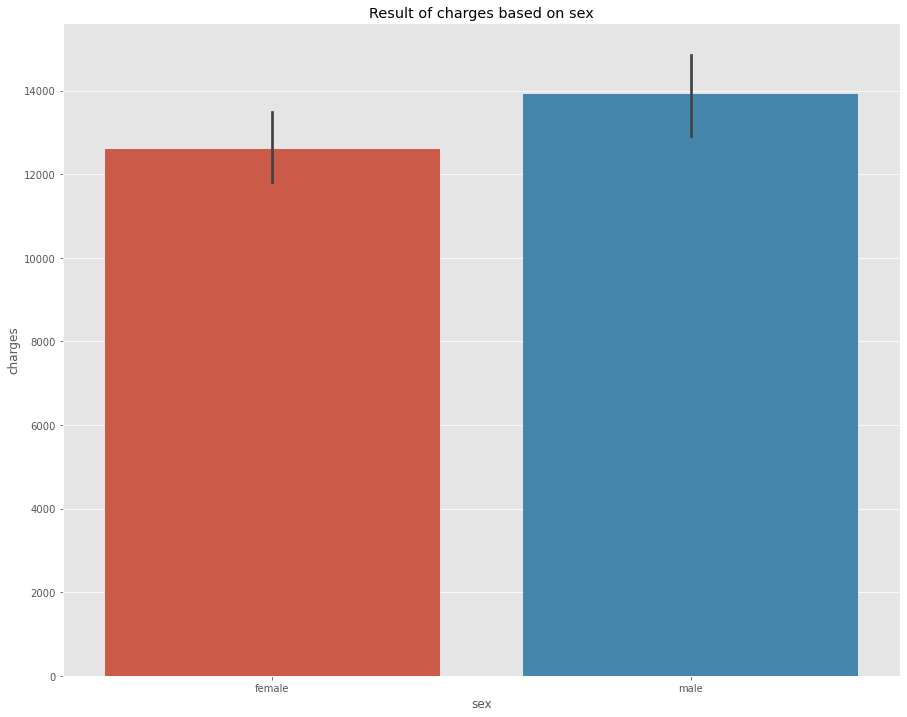

In [9]:
plt.figure(figsize=(15,12))
sns.barplot(x='sex', y='charges', data=data).set_title('Result of charges based on sex')

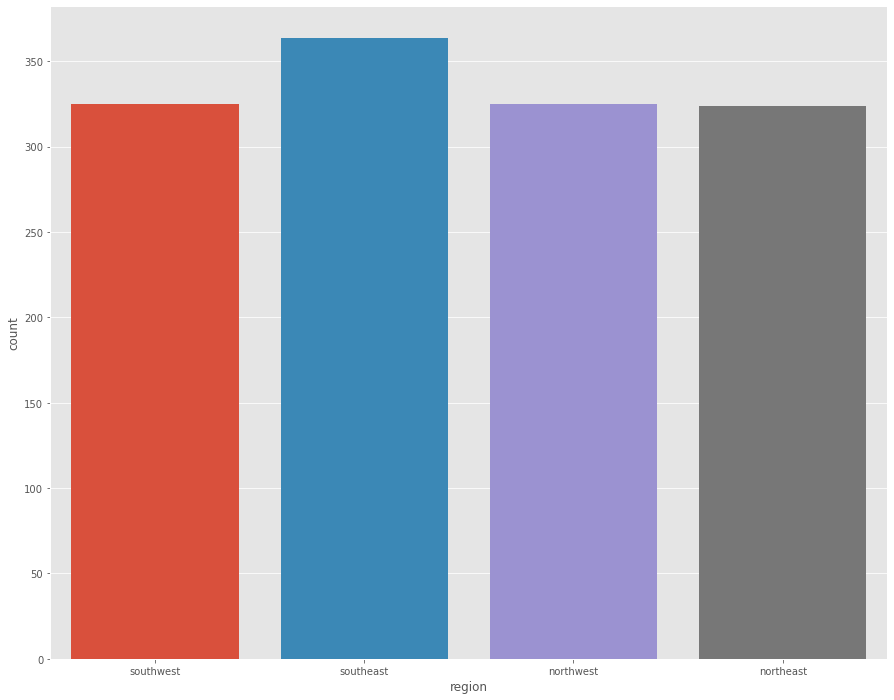

In [10]:
plt.figure(figsize=(15,12))
sns.countplot(data.region, saturation=0.9)

In [11]:
#Encoding categorical columns using get_dummies
data = pd.get_dummies(data, drop_first=True)# Dropping the extra column from each categorical column
data.head()                                 #To void the dummy variable trap

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.924000,0,1,0,0,1
1,18,33.770,1,1725.552300,1,0,0,1,0
2,28,33.000,3,4449.462000,1,0,0,1,0
3,33,22.705,0,21984.470610,1,0,1,0,0
4,32,28.880,0,13262.294541,1,0,1,0,0


In [12]:
# Converting non float columns to float64
non_float = data.select_dtypes(exclude='float64')
cols_non_float = non_float.columns

for column in cols_non_float:
    data[column] = data[column].astype('float64')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   float64
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   float64
 5   smoker_yes        1338 non-null   float64
 6   region_northwest  1338 non-null   float64
 7   region_southeast  1338 non-null   float64
 8   region_southwest  1338 non-null   float64
dtypes: float64(9)
memory usage: 94.2 KB


In [13]:
# Splitting to dependant and independant 
X = data.drop('charges', 1).values
y = data.charges.values

In [14]:
# Splitting to training and testing/validation data
from sklearn.model_selection import KFold
kf = KFold()

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (1071, 8)
X_test shape: (267, 8)
Y_train shape: (1071,)
Y_test shape: (267,)


In [15]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Training the model and evaluating using the mse metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

estimators = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(),
             SVR(), KNeighborsRegressor(), XGBRegressor()]

for model in estimators:
    model.fit(X_train ,Y_train)
    Y_pred = model.predict(X_test)
    accuracy = model.score(X_test, Y_test)
    mse = mean_squared_error(Y_test, Y_pred)
    
    print(f'{model}, Accuracy: {accuracy}')
    print(f'{model} MSE: {mse}')
    print('='*160)
    
    

LinearRegression(), Accuracy: 0.7531559405846868
LinearRegression() MSE: 37492897.707357615
DecisionTreeRegressor(), Accuracy: 0.7062136986596064
DecisionTreeRegressor() MSE: 44622907.96087516
RandomForestRegressor(), Accuracy: 0.8448964804505642
RandomForestRegressor() MSE: 23558518.711337414
SVR(), Accuracy: -0.09557563499984645
SVR() MSE: 166405889.25258297
KNeighborsRegressor(), Accuracy: 0.7833881072093243
KNeighborsRegressor() MSE: 32900964.105981257
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', vali